## Modeling

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.cm as cm
from shapely.geometry import Polygon, mapping
import folium


BTVpolice = pd.read_csv('data/BTVpolice.csv')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import pandas as pd

# Convert 'call_time' to datetime
BTVpolice['call_time'] = pd.to_datetime(BTVpolice['call_time'], errors='coerce')

# Extract features from 'call_time'
BTVpolice['Hour'] = BTVpolice['call_time'].dt.hour
BTVpolice['DayOfWeek'] = BTVpolice['call_time'].dt.day_name()

# Select features and target
features = ['Hour', 'DayOfWeek', 'priority']
target = 'alcohol_related'

# Convert categorical features to numerical using one-hot encoding
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(BTVpolice[['DayOfWeek', 'priority']]).toarray()

# Combine with numerical features
numerical_features = pd.DataFrame({'Hour': BTVpolice['Hour']})
X = pd.concat([numerical_features.reset_index(drop=True), pd.DataFrame(encoded_features)], axis=1)

# Ensure all column names are strings
X.columns = X.columns.astype(str)

# Define the target
y = BTVpolice[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97    110300
           1       0.00      0.00      0.00      7452

    accuracy                           0.94    117752
   macro avg       0.47      0.50      0.48    117752
weighted avg       0.88      0.94      0.91    117752



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

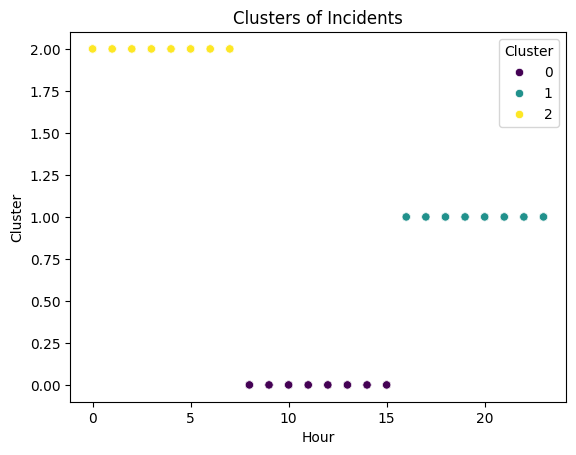

In [6]:
from sklearn.cluster import KMeans
import seaborn as sns

# Extract relevant features
BTVpolice['Month'] = BTVpolice['call_time'].dt.month
BTVpolice['Year'] = BTVpolice['call_time'].dt.year

cluster_data = BTVpolice[['Hour', 'Month', 'Area']].dropna()

# Encode categorical variables
encoded_cluster_data = pd.get_dummies(cluster_data, columns=['Area'])

# Fit a KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(encoded_cluster_data)

# Visualize clusters
sns.scatterplot(
    data=cluster_data,
    x='Hour', y='Cluster',
    hue='Cluster', palette='viridis'
)
plt.title('Clusters of Incidents')
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Convert 'call_time' to datetime
BTVpolice['call_time'] = pd.to_datetime(BTVpolice['call_time'], errors='coerce')

# Extract features from 'call_time'
BTVpolice['Date'] = BTVpolice['call_time'].dt.date
BTVpolice['DayOfWeek'] = BTVpolice['call_time'].dt.day_name()
BTVpolice['Month'] = BTVpolice['call_time'].dt.month

# Aggregate data to get the number of calls per day
calls_per_day = BTVpolice.groupby(['Date', 'DayOfWeek', 'Month']).size().reset_index(name='NumCalls')

# Encode categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(calls_per_day[['DayOfWeek', 'Month']]).toarray()

# Prepare the feature matrix and target variable
X = pd.DataFrame(encoded_features)
y = calls_per_day['NumCalls']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=80)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Display sample predictions
predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(predictions.head())


Mean Squared Error: 422.6443667444219
R^2 Score: 0.2447581207304783
   Actual  Predicted
0     103  95.328125
1      77  68.660156
2     103  75.152344
3     121  96.285156
4      76  92.316406


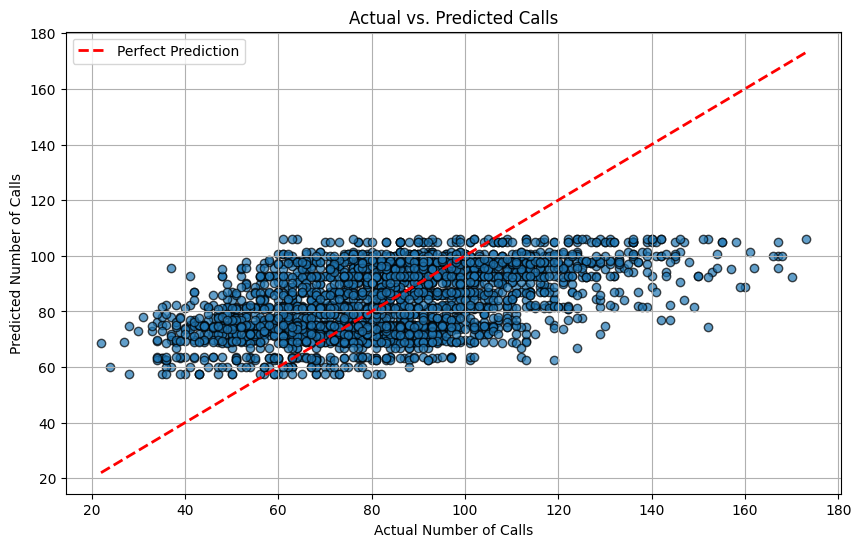

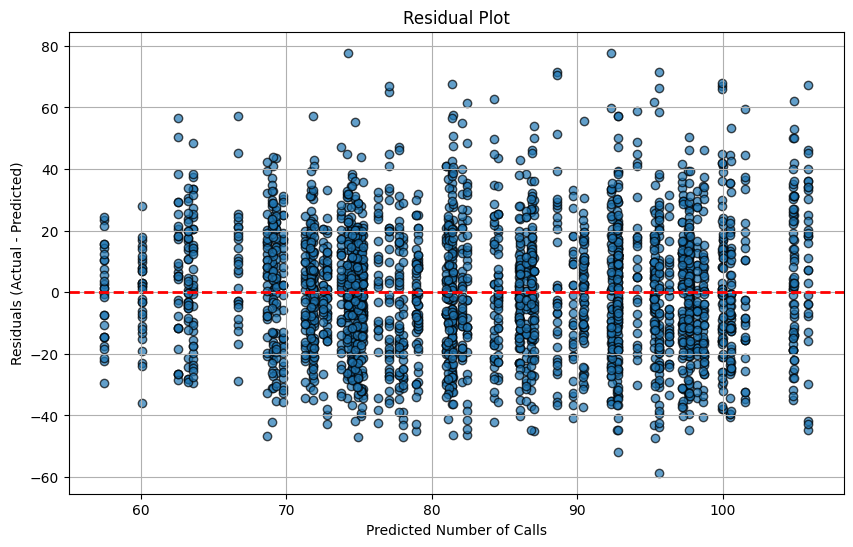

In [13]:
import matplotlib.pyplot as plt

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Calls')
plt.xlabel('Actual Number of Calls')
plt.ylabel('Predicted Number of Calls')
plt.legend()
plt.grid()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolors='k')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Number of Calls')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid()
plt.show()


RMSE: 15.159386830771016


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


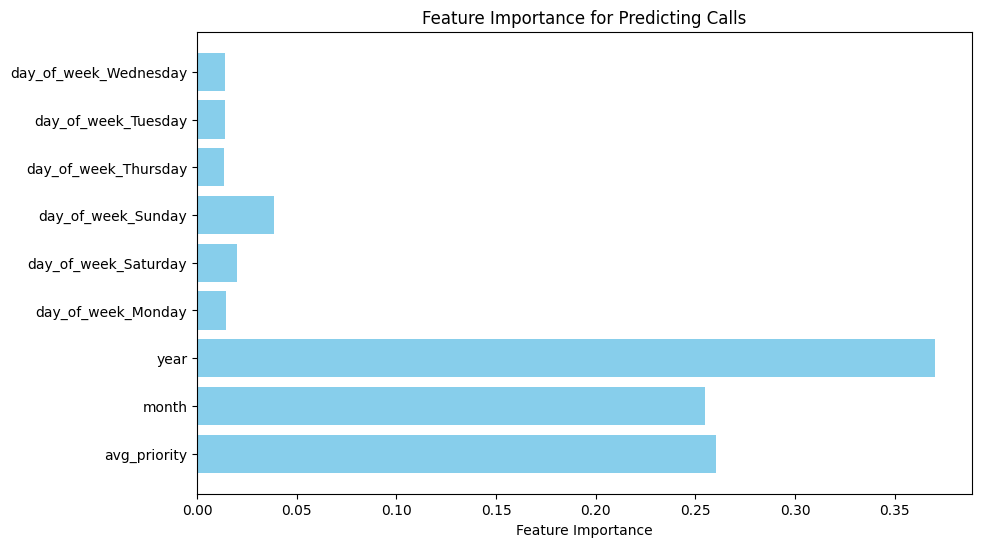

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Ensure call_time is in datetime format
BTVpolice['call_time'] = pd.to_datetime(BTVpolice['call_time'], errors='coerce')

# Calculate average priority and number of calls per day
BTVpolice['priority_numeric'] = BTVpolice['priority'].str.extract('(\d+)').astype(float)  # Extract numeric priority
daily_data = BTVpolice.groupby(BTVpolice['call_time'].dt.date).agg(
    avg_priority=('priority_numeric', 'mean'),
    calls=('incident_number', 'count'),
    month=('call_time', lambda x: x.dt.month.iloc[0]),
    day_of_week=('call_time', lambda x: x.dt.day_name().iloc[0]),
    year=('call_time', lambda x: x.dt.year.iloc[0])
).reset_index()

# One-hot encode day_of_week
daily_data = pd.get_dummies(daily_data, columns=['day_of_week'], drop_first=True)

# Prepare features and target
X = daily_data.drop(columns=['calls', 'call_time'])
y = daily_data['calls']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


import matplotlib.pyplot as plt

# Plot feature importance
importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Predicting Calls')
plt.show()



In [16]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.5840857390543184


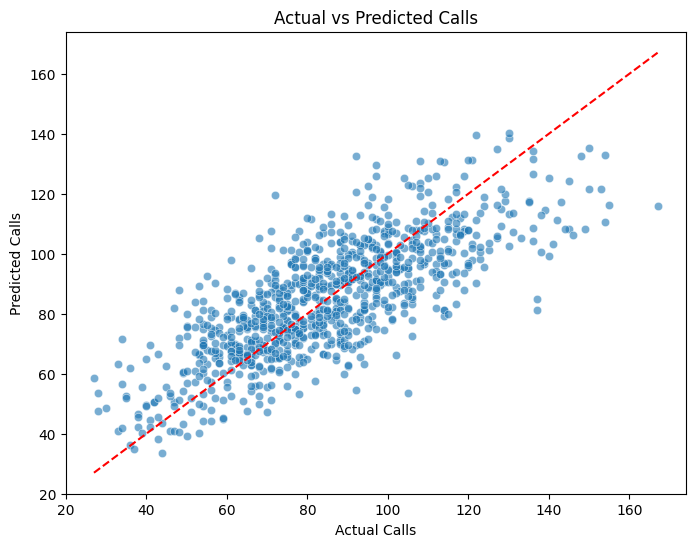

In [15]:
import seaborn as sns

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Calls')
plt.ylabel('Predicted Calls')
plt.title('Actual vs Predicted Calls')
plt.show()


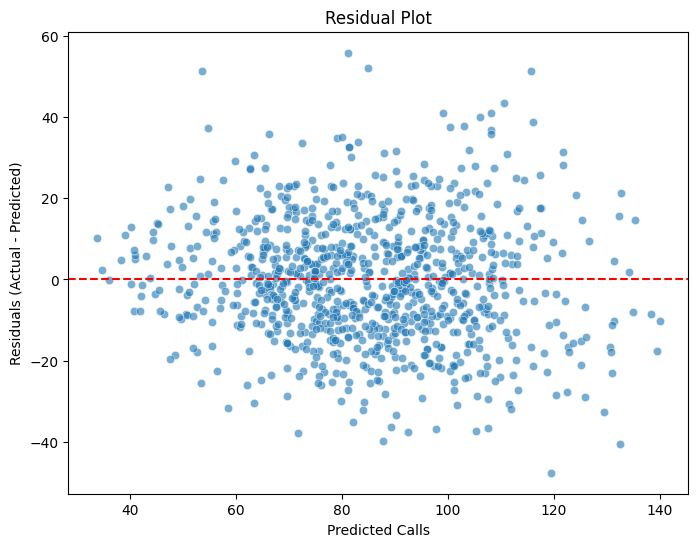

In [17]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Calls')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Check for missing data in the original dataset
print("Missing data before cleaning:")
print(BTVpolice.isnull().sum())

# Check the percentage of missing data in each column
print("\nPercentage of missing data before cleaning:")
print(BTVpolice.isnull().mean() * 100)

# Ensure 'call_time' is in datetime format
BTVpolice['call_time'] = pd.to_datetime(BTVpolice['call_time'], errors='coerce')

# Ensure 'priority' is numeric
BTVpolice['priority'] = pd.to_numeric(BTVpolice['priority'], errors='coerce')

# Ensure there are no null values in the critical columns after type conversion
print("\nMissing data after type conversion:")
print(BTVpolice[['call_time', 'priority', 'Area']].isnull().sum())

# Now let's clean the data, removing rows with NaNs in essential columns ('call_time', 'priority', and 'Area')
BTVpolice_cleaned = BTVpolice.dropna(subset=['call_time', 'priority', 'Area'])

# Check the shape after cleaning
print(f"\nShape of cleaned dataset: {BTVpolice_cleaned.shape}")

# Check if the data has been cleaned correctly or if too much data has been lost
if BTVpolice_cleaned.shape[0] == 0:
    raise ValueError("No data available after cleaning. Check your missing data strategy.")

# Aggregate by date, month, year, and area
daily_calls = BTVpolice_cleaned.groupby([BTVpolice_cleaned['call_time'].dt.date, 'Month', 'Year', 'Area']).agg(
    priority=('priority', 'mean'),
    TotalCalls=('call_time', 'count')
).reset_index()

# Check shape and inspect aggregated data
print(f"Shape of daily_calls after aggregation: {daily_calls.shape}")
print(daily_calls.head())

# Drop rows where TotalCalls or priority is missing
daily_calls = daily_calls.dropna(subset=['TotalCalls', 'priority'])

# Ensure there is enough data for training
print(f"Shape of daily_calls after dropping missing values: {daily_calls.shape}")

# If still no data available, raise an error
if daily_calls.shape[0] == 0:
    raise ValueError("No data available for training after aggregation and cleaning.")

# One-Hot Encode the 'Area' feature
daily_calls = pd.get_dummies(daily_calls, columns=['Area'], drop_first=True)

# Define features (X) and target variable (y)
X = daily_calls[['priority', 'Month', 'Year'] + [col for col in daily_calls if col.startswith('Area_')]]  # Features
y = daily_calls['TotalCalls']  # Target variable (number of calls)

# Check the shapes of X and y before splitting
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared and Mean Squared Error (MSE)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Output the R-squared and MSE
print(f'R-squared: {r_squared}')
print(f'Mean Squared Error: {mse}')

# Plot the residuals (Observed vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test - y_pred, color='blue', label='Residuals')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red', linestyle='dashed', label='Zero Error Line')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


Missing data before cleaning:
incident_number         0
call_type               0
call_type_group         0
call_time               0
Street                  0
call_origin             0
mental_health           0
drug_related            0
dv_related              0
alcohol_related         0
Area                    0
AreaName                0
Latitude                0
Longitude               0
Hour                    0
DayOfWeek               0
priority           350885
Month                   0
ObjectId                0
Year                    0
dtype: int64

Percentage of missing data before cleaning:
incident_number      0.0
call_type            0.0
call_type_group      0.0
call_time            0.0
Street               0.0
call_origin          0.0
mental_health        0.0
drug_related         0.0
dv_related           0.0
alcohol_related      0.0
Area                 0.0
AreaName             0.0
Latitude             0.0
Longitude            0.0
Hour                 0.0
DayOfWeek        

ValueError: No data available after cleaning. Check your missing data strategy.

In [60]:
BTVpolice
BTVpolice = pd.read_csv('data/BTVpolice_cleaned.csv')